In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from pathlib import Path

In [2]:
os.chdir('../')

In [3]:
%pwd

'c:\\Users\\Gautam\\Desktop\\project_of_ds_and_ml\\codesoft\\credit_card_fraud_detection'

# Loading Data for the EDA

In [4]:
data_path=Path("artifacts/data_ingestion/data/fraudTrain.csv")
print(data_path)
df = pd.read_csv(data_path)

df.head().T

artifacts\data_ingestion\data\fraudTrain.csv


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.97,107.23,220.11,45.0,41.96
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest


In [5]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
len(df["job"].unique())

494

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(["Unnamed: 0", 'first', 'last', 'street', 'trans_num'],axis=1, inplace=True)

c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_fraud', ylabel='count'>

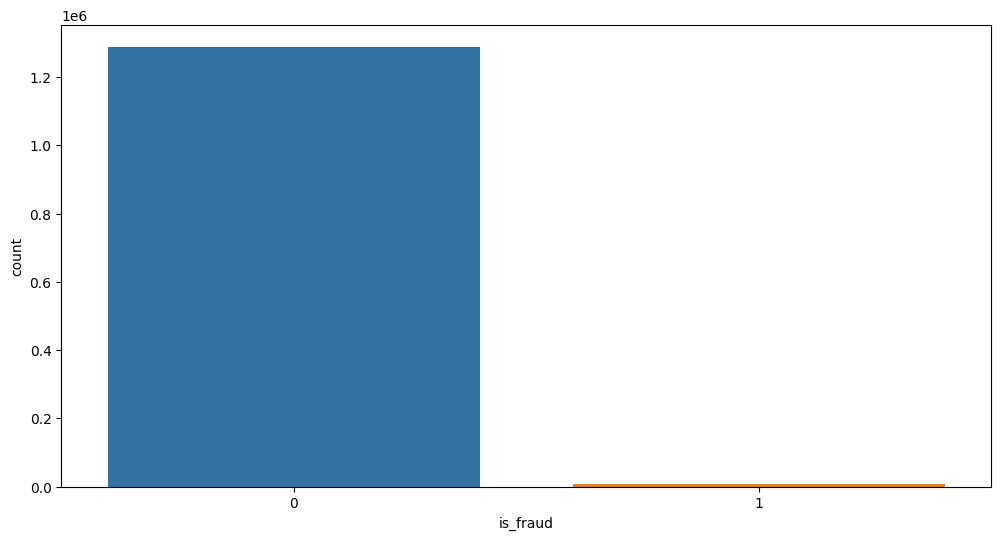

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['is_fraud'])

c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\c

<Axes: xlabel='gender', ylabel='count'>

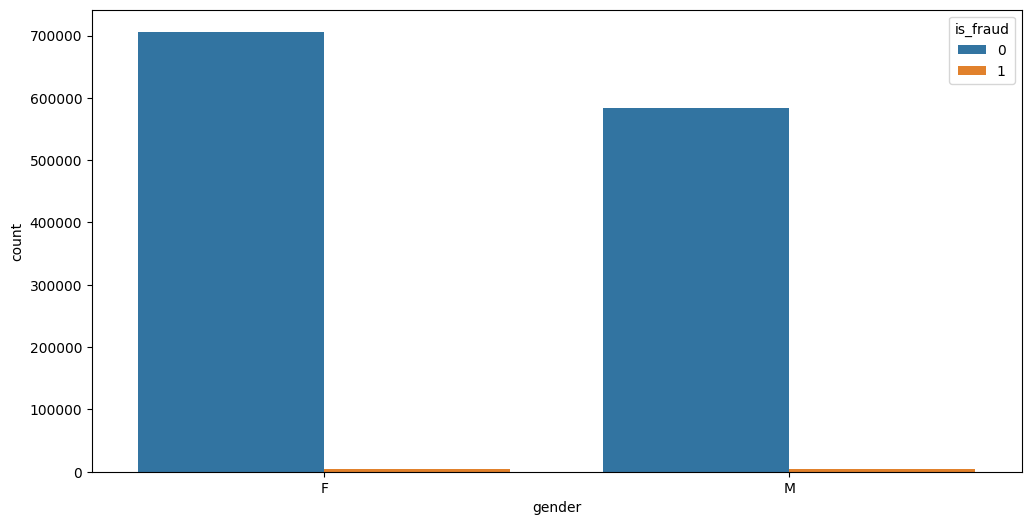

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'gender', hue = 'is_fraud', data = df)

c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\codesoft\credit_card_fraud_detection\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gautam\Desktop\project_of_ds_and_ml\c

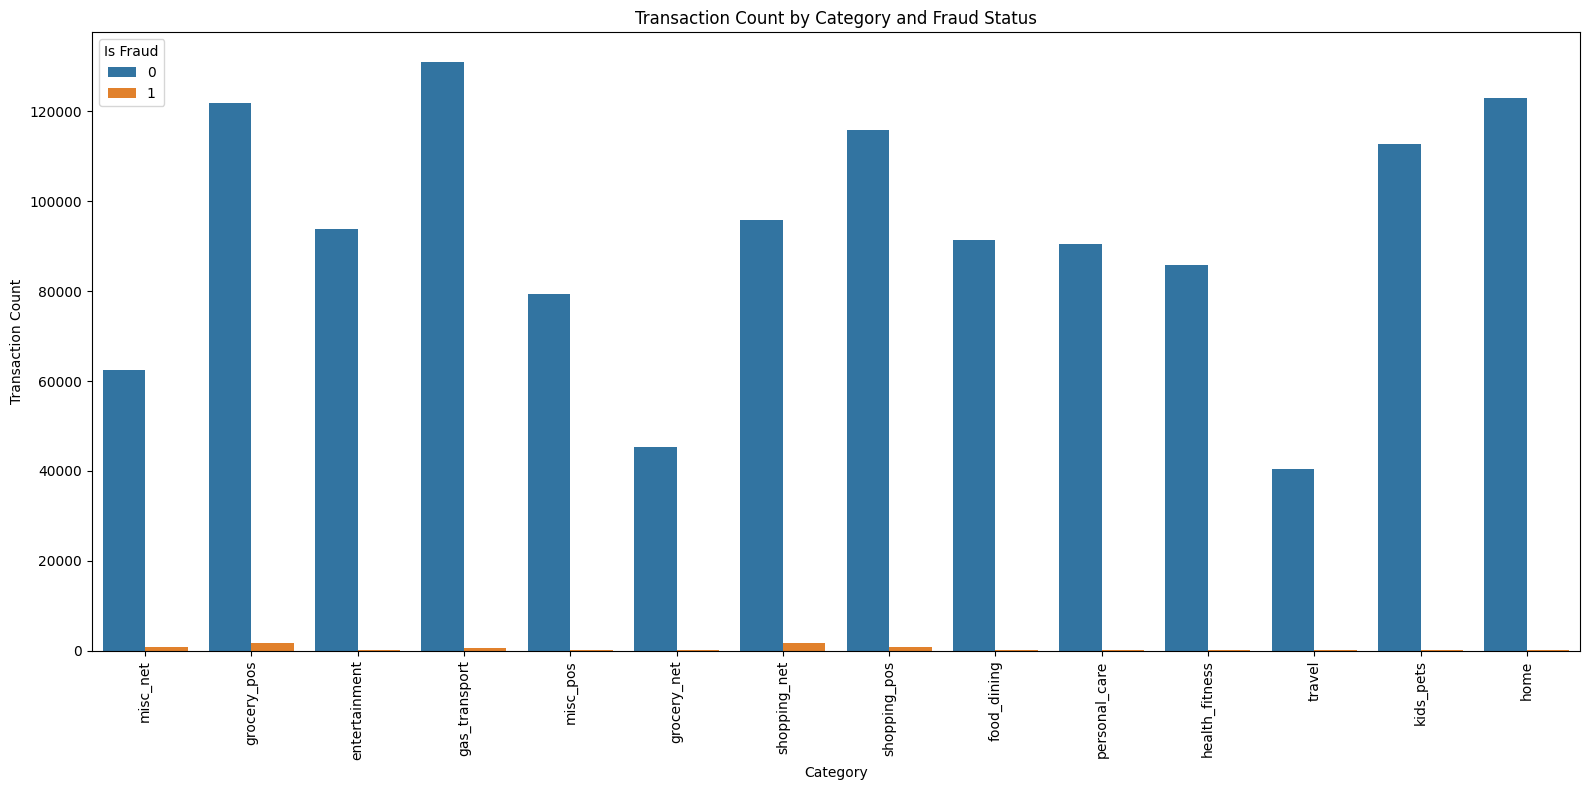

In [13]:
plt.figure(figsize=(16, 8))
sns.countplot(x='category', hue='is_fraud', data=df)
plt.xticks(rotation=90)
plt.title("Transaction Count by Category and Fraud Status")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

In [14]:
X = df.drop(['is_fraud'], axis = 1)
Y = df['is_fraud']

In [15]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category',
        'gender', 'city', 'state', 'job', 'dob']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

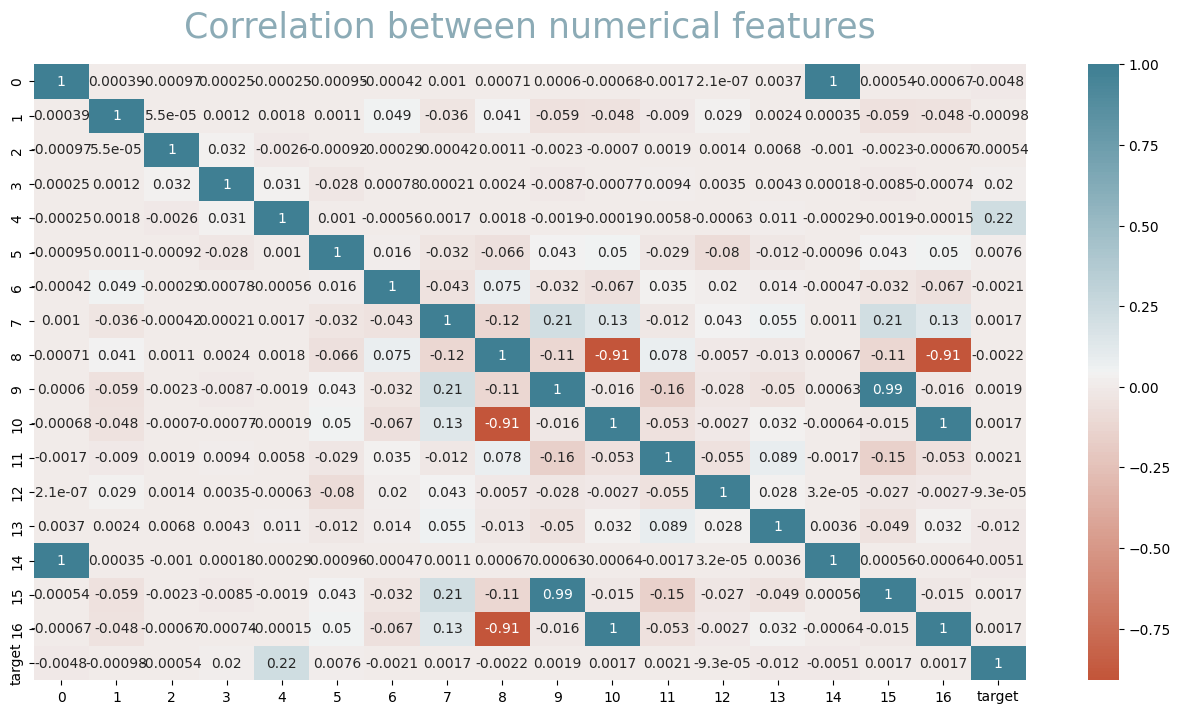

In [17]:
temp=pd.DataFrame(X)
temp['target']=Y
correlation = temp.corr()
plt.figure(figsize = [16,8])
plt.title("Correlation between numerical features", size = 25, pad = 20, color = '#8cabb6')
sns.heatmap(correlation, cmap = sns.diverging_palette(20, 220, n = 200), annot = True)
plt.show()

In [18]:
Y = df[['is_fraud']].values

In [19]:
X.shape, Y.shape

((1296675, 17), (1296675, 1))

In [20]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [21]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(X, Y)

In [22]:
x_sampled.shape, y_sampled.shape

((15012, 17), (15012,))

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [26]:
pred_train = lr_classifier.predict(x_train)
pred_test  = lr_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.7928220501290698
Testing Set Accuracy  :  0.8021978021978022


## LogisticRegression is underfitting

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [28]:
pred_train = dt_classifier.predict(x_train)
pred_test  = dt_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  0.9600399600399601


## DecisionTreeClassifier is overfitting

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=2)

In [30]:
pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9797651761179116
Testing Set Accuracy  :  0.951048951048951


## Random Forest is fitting very well